In [1]:
# importing libraries as required
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
# Using the correct encoding format to read entries
companies = pd.read_csv('./data/companies.csv', encoding="ISO-8859-1")
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [2]:
# overview of dataframe
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Boardz,Karma,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [3]:
# Checking unique values in company names
companies_companies = companies['permalink'].nunique(dropna = True)
print(companies_companies)
print(companies.isna().sum())

66368
permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64


In [4]:
# Reading rounds2 data file with correct encoding
rounds2 = pd.read_csv('./data/rounds2.csv', encoding="ISO-8859-1")
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [5]:
rounds2.company_permalink.describe()

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [6]:
companies_round2 = rounds2['company_permalink'].nunique(dropna = True)
print(companies_round2)
print(rounds2.isnull().any())

90247
company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
dtype: bool


In [7]:
# Visual examination revealed inconsistent case so we make these columns lower-case
# This is important as they are used as primary keys
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [8]:
# We compare number of entries
companies_companies = companies['permalink'].nunique(dropna = True)
print(companies_companies)
companies_round2 = rounds2['company_permalink'].nunique(dropna = True)
print(companies_round2)


66368
66370


In [9]:
# Trying to check garbage values
set_companies = set(companies['permalink'].unique())
set_rounds2 = set(rounds2['company_permalink'].unique())
missing_in_companies = set_rounds2 - set_companies
print(missing_in_companies)

{'/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80', '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80', '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80', '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80', '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦', '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f', '/organization/e-cã\x8abica'}


In [10]:
# Performing an inner merge. A join could also have been used.
master_frame = pd.merge(rounds2, companies , how='inner', left_on = 'company_permalink', right_on = 'permalink')
master_frame.shape
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,"41,313.00",/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,"32,842.00",/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114939,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114940,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,"18,192.00",/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [11]:
# Getting useful stats from the data
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114942 non-null  object 
 1   funding_round_permalink  114942 non-null  object 
 2   funding_round_type       114942 non-null  object 
 3   funding_round_code       31139 non-null   object 
 4   funded_at                114942 non-null  object 
 5   raised_amount_usd        94958 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [12]:
# Checking for null values
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [13]:
# Counts of null values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [14]:
# Percentage of null values
round((master_frame.isnull().sum()*100/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [15]:
# Dropping irrelevant columns
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

In [16]:
master_frame = master_frame.dropna(subset=['raised_amount_usd'])
round((master_frame.isnull().sum()*100/len(master_frame.index)), 2)

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
dtype: float64

Checkpoint 1 XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [17]:
master_frame['funding_round_type'].value_counts()

venture                  50228
seed                     23602
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: funding_round_type, dtype: int64

In [18]:
# Pivot tables can be used instead of groupby, although for fun, I've used both!
# We check the amounts raised using mean and median as estimators
funding_type_median = pd.pivot_table(data=master_frame,index=['funding_round_type'], values = 'raised_amount_usd', aggfunc = 'median')
funding_type_mean = pd.pivot_table(data=master_frame,index=['funding_round_type'], values = 'raised_amount_usd', aggfunc = 'mean')

In [19]:
funding_type_median.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
funding_round_type,
secondary_market,"32,600,000.00"
private_equity,"20,000,000.00"
post_ipo_debt,"19,950,000.00"
post_ipo_equity,"12,262,852.50"
venture,"5,000,000.00"
debt_financing,"1,100,000.00"
undisclosed,"1,018,680.00"
angel,"400,000.00"
seed,"275,000.00"


In [20]:
funding_type_mean.sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
funding_round_type,
post_ipo_debt,"168,704,571.82"
post_ipo_equity,"82,182,493.87"
secondary_market,"79,649,630.10"
private_equity,"73,308,593.03"
undisclosed,"19,242,370.23"
debt_financing,"17,043,526.02"
venture,"11,748,949.13"
grant,"4,300,576.34"
convertible_note,"1,453,438.54"


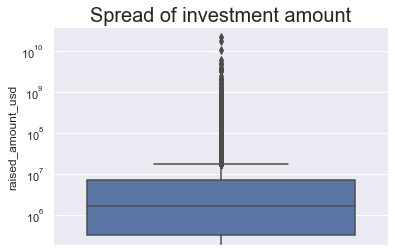

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
singleBoxplot = sns.boxplot(y = master_frame['raised_amount_usd'])
singleBoxplot.set_title('Spread of investment amount',fontsize =20)
plt.yscale('log')
plt.show()

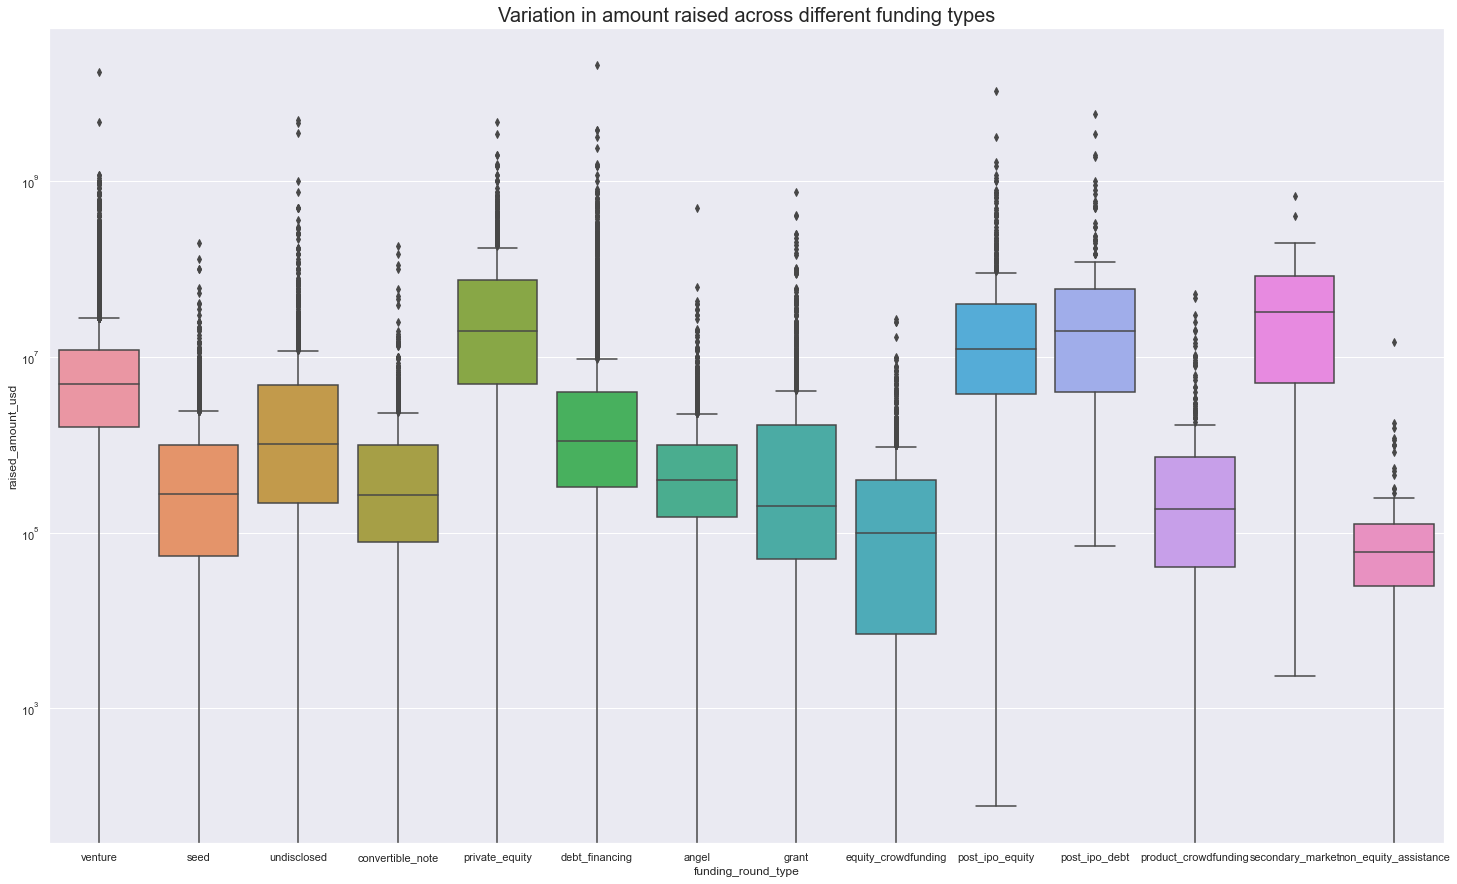

In [22]:
plt.figure(figsize=(25, 15))
myBoxplot = sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = master_frame)
myBoxplot.set_title('Variation in amount raised across different funding types',fontsize =20)
plt.yscale('log')
plt.show()

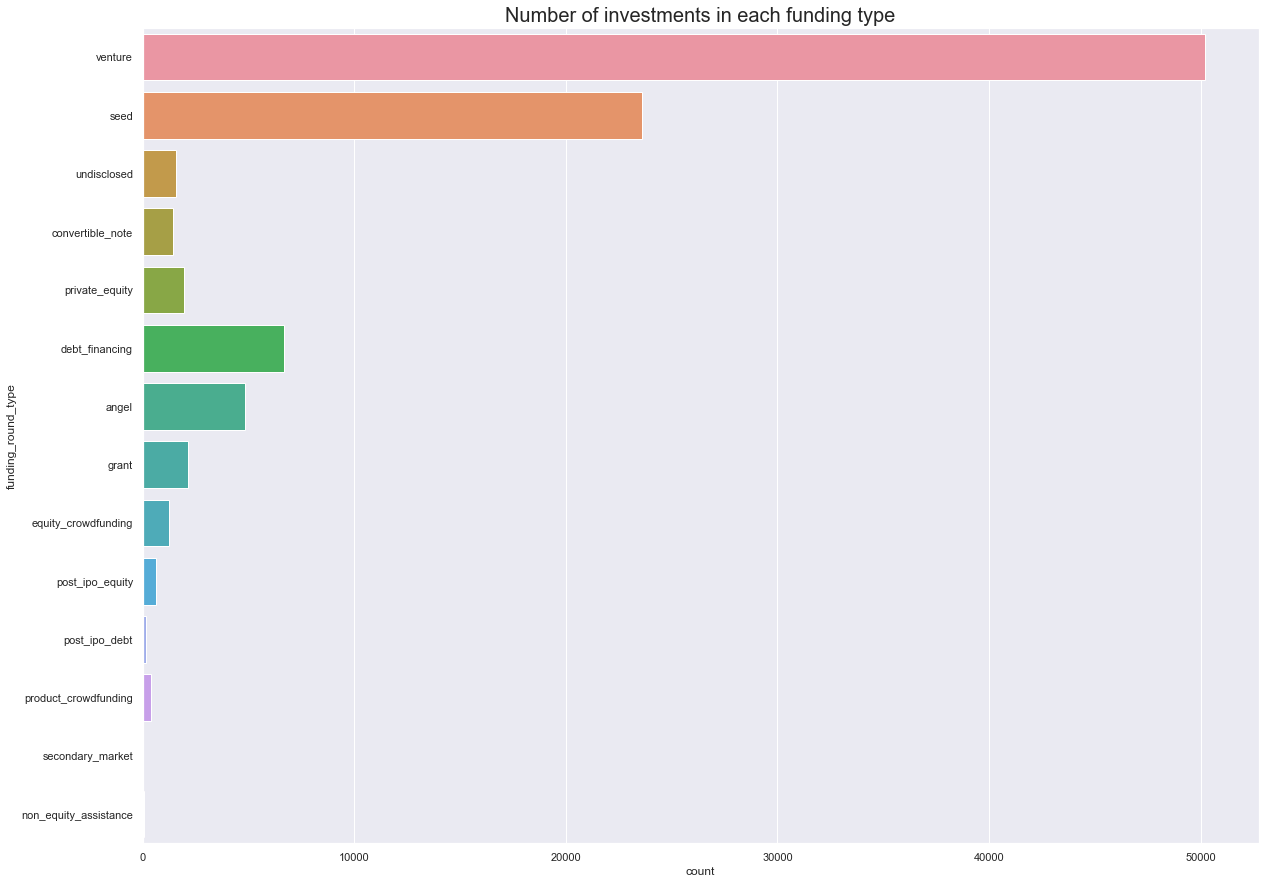

In [23]:
# Plotting the count of each type of funding 
plt.figure(figsize=(20, 15))
fundingType = sns.countplot(y="funding_round_type", data=master_frame)
fundingType.set_title('Number of investments in each funding type',fontsize =20)
plt.show()

['venture' 'seed' 'undisclosed' 'convertible_note' 'private_equity'
 'debt_financing' 'angel' 'grant' 'equity_crowdfunding' 'post_ipo_equity'
 'post_ipo_debt' 'product_crowdfunding' 'secondary_market'
 'non_equity_assistance']


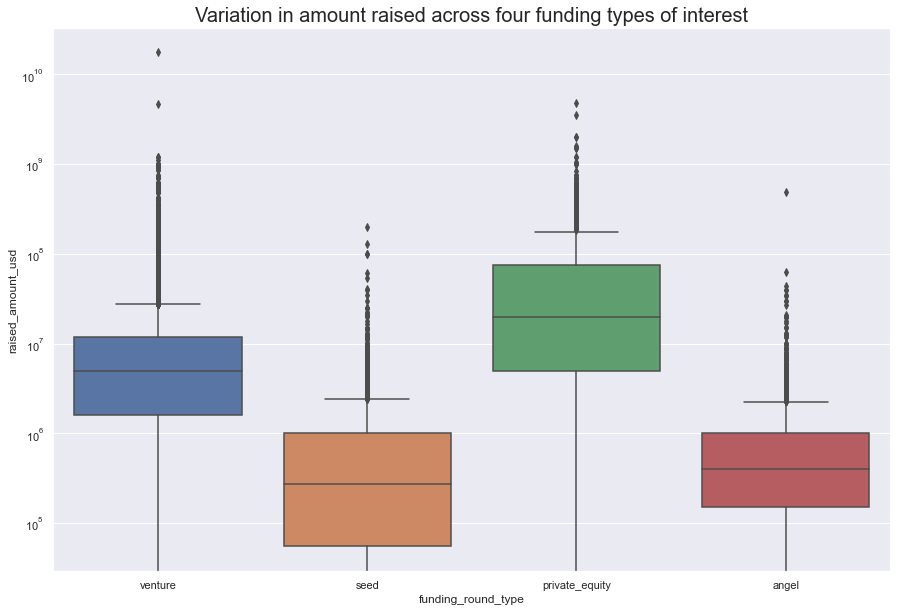

In [24]:
print(master_frame['funding_round_type'].unique())
limited_master_frame = master_frame[master_frame['funding_round_type'].isin(['seed', 'angel', 'venture', 'private_equity'])]

plt.figure(figsize=(15, 10))
myBoxLimited = sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = limited_master_frame)
myBoxLimited.set_title('Variation in amount raised across four funding types of interest',fontsize =20)
plt.yscale('log')
plt.show()

In [25]:
#limited_master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
limited_master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)


funding_round_type
private_equity   20,000,000.00
venture           5,000,000.00
angel               400,000.00
seed                275,000.00
Name: raised_amount_usd, dtype: float64

In [26]:
limited_master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
top9series = limited_master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)[0:9]
top9 = limited_master_frame[limited_master_frame['country_code'].isin(top9series.index)]

In [27]:
print(top9['country_code'].unique())
data_top9 = top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(data_top9)

['IND' 'CHN' 'CAN' 'USA' 'GBR' 'FRA' 'JPN' 'DEU' 'ISR']
country_code
USA   422,510,842,796.00
CHN    39,835,418,773.00
GBR    20,245,627,416.00
IND    14,391,858,718.00
CAN     9,583,332,317.00
FRA     7,259,536,732.00
ISR     6,907,514,579.00
DEU     6,346,959,822.00
JPN     3,363,676,611.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:title={'center':'Total funding amount across top-9 English countries'}, xlabel='country_code', ylabel='Raised amount USD'>

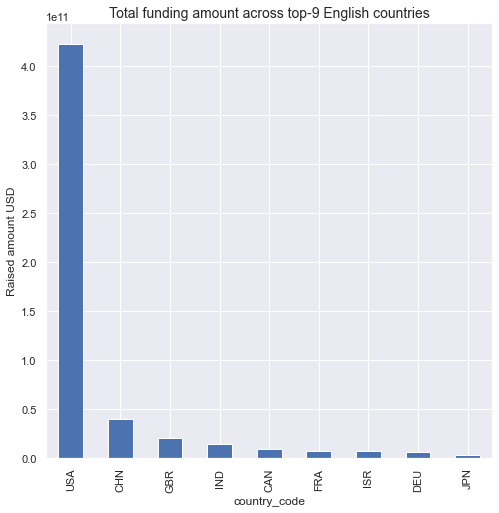

In [28]:
#pie, ax = plt.subplots(figsize=[15,15])
#data_top9.plot.pie(autopct="%.1f%%")

pie, ax = plt.subplots(figsize=[8,8])
plt.title('Total funding amount across top-9 English countries', fontsize=14)
plt.ylabel('Raised amount USD', fontsize=12)
plt.xlabel('Country code', fontsize=12)
data_top9.plot.bar()

In [29]:
top_3_english = top9[top9['country_code'].isin(['IND', 'USA', 'GBR'])]

In [30]:
data_top3english = top_3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(data_top3english)

country_code
USA   422,510,842,796.00
GBR    20,245,627,416.00
IND    14,391,858,718.00
Name: raised_amount_usd, dtype: float64


<AxesSubplot:title={'center':'Total funding amount across top-3 English speaking countries'}, xlabel='country_code', ylabel='Raised amount USD'>

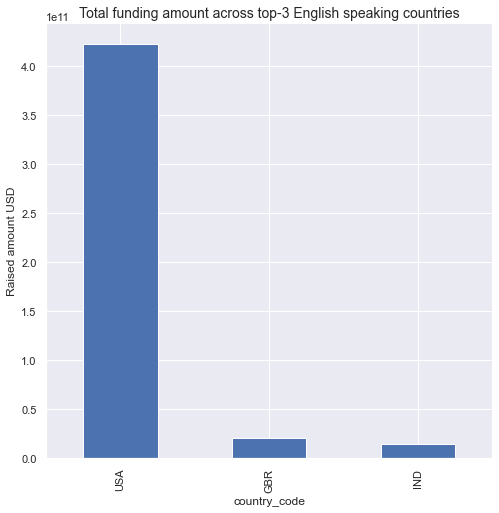

In [31]:
pie, ax = plt.subplots(figsize=[8,8])
plt.title('Total funding amount across top-3 English speaking countries', fontsize=14)
plt.ylabel('Raised amount USD', fontsize=12)
plt.xlabel('Country code', fontsize=12)
data_top3english.plot.bar()

In [32]:
# Removing multiple categories and keeping only first
def select_first(category_list):
    category = category_list.split('|')
    if len(category) > 1:
        return category[0]
    else:
        return category_list

print(select_first('Application Platforms|Real Time|Social Network Media'))
print(select_first('Application Platforms'))

Application Platforms
Application Platforms


In [33]:
# Aligning case again -- this one bug cost me days of time!
type(top_3_english['category_list'][0])
top_3_english['primary_sector'] = top_3_english['category_list'].astype(str).apply(select_first)
top_3_english['primary_sector'] = top_3_english['primary_sector'].str.lower()

<ipython-input-33-128abf115a32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_english['primary_sector'] = top_3_english['category_list'].astype(str).apply(select_first)
<ipython-input-33-128abf115a32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3_english['primary_sector'] = top_3_english['primary_sector'].str.lower()


In [34]:
top_3_english
current_frame_length = len(top_3_english)
print(current_frame_length)

39018


In [35]:
mapping = pd.read_csv('data/mapping.csv')
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [36]:
# I used this technique for getting the maximum values out of the 1-hot encoded data.
# I also compared this to using Melt as seen from commented code, but I like this as it is compact and a
# tiny bit more efficient

mapping['category_list'] = mapping['category_list'].str.lower()
mapping['main_sector'] = mapping.iloc[:, 1:].idxmax(axis = 1, skipna = True)
#value_vars = list(mapping.columns[1:])
#id_vars = list(np.setdiff1d(mapping.columns, value_vars))
#mapping_result = pd.melt(mapping, id_vars = id_vars, value_vars = value_vars)
#mapping_result = mapping_result[mapping_result['value']==1]
#mapping_result = mapping_result.drop('value', axis=1)
#mapping_result = mapping_result.rename(columns={'variable': 'main_sector'})
#mapping_result = mapping_result.rename(columns={'category_list': 'primary_sector'})
#mapping_result.head()

In [37]:
mapping_result = mapping.loc[:, ('category_list', 'main_sector')]
mapping_result = mapping_result.rename(columns={'category_list': 'primary_sector'})
mapping_result['primary_sector'] = mapping_result['primary_sector'].replace({'0': 'na'}, regex=True)
print(mapping_result.primary_sector.sort_values(ascending=True))
print(mapping_result.main_sector.value_counts())

1                    3d
2           3d printing
3         3d technology
4            accounting
5      active lifestyle
             ...       
684    wine and spirits
685            wireless
686               women
687        young adults
0                   NaN
Name: primary_sector, Length: 688, dtype: object
Others                                     195
Social, Finance, Analytics, Advertising    153
Entertainment                               89
News, Search and Messaging                  72
Health                                      63
Cleantech / Semiconductors                  53
Manufacturing                               40
Automotive & Sports                         22
Blanks                                       1
Name: main_sector, dtype: int64


In [38]:
# Merging using an inner join as ultimately we only need the common entries in both tables.
final_frame = pd.merge(top_3_english, mapping_result, how='inner', on='primary_sector')
final_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        38788 non-null  object 
 1   funding_round_permalink  38788 non-null  object 
 2   funding_round_type       38788 non-null  object 
 3   funded_at                38788 non-null  object 
 4   raised_amount_usd        38788 non-null  float64
 5   permalink                38788 non-null  object 
 6   name                     38788 non-null  object 
 7   category_list            38788 non-null  object 
 8   status                   38788 non-null  object 
 9   country_code             38788 non-null  object 
 10  primary_sector           38788 non-null  object 
 11  main_sector              38788 non-null  object 
dtypes: float64(1), object(11)
memory usage: 3.8+ MB


In [39]:
#print(final_frame[final_frame['main_sector'].isin(['blank'])])
#final_frame.drop(final_frame.index[final_frame['_merge'] == 'left_only'], inplace = True)
new_frame_length = len(final_frame)
print(new_frame_length)

38788


In [40]:
D1 = final_frame[final_frame['country_code'].isin(['USA']) & final_frame['raised_amount_usd'].ge(5000000) & final_frame['raised_amount_usd'].le(15000000)]
D2 = final_frame[final_frame['country_code'].isin(['GBR']) & final_frame['raised_amount_usd'].ge(5000000) & final_frame['raised_amount_usd'].le(15000000)]
D3 = final_frame[final_frame['country_code'].isin(['IND']) & final_frame['raised_amount_usd'].ge(5000000) & final_frame['raised_amount_usd'].le(15000000)]
D1

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,"5,000,000.00",/organization/all-def-digital,All Def Digital,Media,operating,USA,media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,"5,000,000.00",/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,"5,000,000.00",/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,"5,000,000.00",/organization/huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
25,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,"10,000,000.00",/organization/matchmine,MatchMine,Media|News|Reviews and Recommendations,closed,USA,media,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
38766,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,18-09-2013,"5,000,000.00",/organization/thredhq,Thredhq,Social + Mobile + Local|Social Network Media,operating,USA,social + mobile + local,"Social, Finance, Analytics, Advertising"
38771,/organization/wizrocket-technologies,/funding-round/195738852853780cc8f1220ba6fb761d,venture,03-08-2015,"8,000,000.00",/organization/wizrocket-technologies,CleverTap,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,consumer behavior,"Social, Finance, Analytics, Advertising"
38775,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,24-01-2001,"8,250,000.00",/organization/user-interface,User Interface,User Interface,operating,USA,user interface,Others
38777,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,09-06-2014,"10,500,000.00",/organization/washio,Washio,Service Industries,operating,USA,service industries,Others


In [41]:
def getCountandSum(df):
    count = df['raised_amount_usd'].count()
    sum = df['raised_amount_usd'].sum()
    return (count, sum)
print("For country = " + D1['country_code'].unique())
print(getCountandSum(D1))
print()
print("For country = " + D2['country_code'].unique())
print(getCountandSum(D2))
print()
print("For country = " + D3['country_code'].unique())
print(getCountandSum(D3))

['For country = USA']
(12063, 107757097294.0)

['For country = GBR']
(621, 5379078691.0)

['For country = IND']
(328, 2949543602.0)


In [42]:
def getTopSectorandCounts(df):
    myTable = df.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)[0:3]
    return(myTable)
print("For country = " + D1['country_code'].unique())
print(getTopSectorandCounts(D1))
print()
print("For country = " + D2['country_code'].unique())
print(getTopSectorandCounts(D2))
print()
print("For country = " + D3['country_code'].unique())
print(getTopSectorandCounts(D3))

['For country = USA']
main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: raised_amount_usd, dtype: int64

['For country = GBR']
main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: raised_amount_usd, dtype: int64

['For country = IND']
main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: raised_amount_usd, dtype: int64


In [43]:
def getTopSectorandAmounts(df):
    myTable = df.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)[0:3]
    return(myTable)
print("For country = " + D1['country_code'].unique())
print(getTopSectorandAmounts(D1))
print()
print("For country = " + D2['country_code'].unique())
print(getTopSectorandAmounts(D2))
print()
print("For country = " + D3['country_code'].unique())
print(getTopSectorandAmounts(D3))

['For country = USA']
main_sector
Others                                    26,321,007,002.00
Social, Finance, Analytics, Advertising   23,807,376,964.00
Cleantech / Semiconductors                21,633,430,822.00
Name: raised_amount_usd, dtype: float64

['For country = GBR']
main_sector
Others                                    1,283,624,289.00
Cleantech / Semiconductors                1,163,990,056.00
Social, Finance, Analytics, Advertising   1,089,404,014.00
Name: raised_amount_usd, dtype: float64

['For country = IND']
main_sector
Others                                    1,013,409,507.00
Social, Finance, Analytics, Advertising     550,549,550.00
News, Search and Messaging                  433,834,545.00
Name: raised_amount_usd, dtype: float64


In [44]:
def getTopCompanyBySum(df, sector):
    myTable = df.where(df['main_sector'].isin([sector]))
    return myTable.groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False)
 
print("For country = " + D1['country_code'].unique())
top_count = 0
D1_topSectors = getTopSectorandCounts(D1).index
D1_company = getTopCompanyBySum(D1, D1_topSectors[top_count])
print(D1_company.head())
print()
print("In {} sector, the number {} company is {} with a net investment of {} USD".format(D1_topSectors[top_count], 1, D1_company.index[0], D1_company[0]))
print()
D2_topSectors = getTopSectorandCounts(D2).index
D2_company = getTopCompanyBySum(D2, D2_topSectors[top_count])
print("For country = " + D2['country_code'].unique())
print(D2_company.head())
print()
print("In {} sector, the number {} company is {} with a net investment of {} USD".format(D2_topSectors[top_count], 1, D2_company.index[0], D2_company[0]))
print()
D3_topSectors = getTopSectorandCounts(D3).index
D3_company = getTopCompanyBySum(D3, D3_topSectors[top_count])
print("For country = " + D3['country_code'].unique())
print(D3_company.head())
print()
print("In {} sector, the number {} company is {} with a net investment of {} USD".format(D3_topSectors[top_count], 1, D3_company.index[0], D3_company[0]))
print()


['For country = USA']
company_permalink
/organization/virtustream           64,300,000.00
/organization/capella               54,968,051.00
/organization/airtight-networks     54,201,907.00
/organization/decarta               52,100,000.00
/organization/black-duck-software   51,000,000.00
Name: raised_amount_usd, dtype: float64

In Others sector, the number 1 company is /organization/virtustream with a net investment of 64300000.0 USD

['For country = GBR']
company_permalink
/organization/electric-cloud            37,000,000.00
/organization/sensage                   36,250,000.00
/organization/enigmatic                 32,500,000.00
/organization/silverrail-technologies   29,000,000.00
/organization/opencloud                 27,972,766.00
Name: raised_amount_usd, dtype: float64

In Others sector, the number 1 company is /organization/electric-cloud with a net investment of 37000000.0 USD

['For country = IND']
company_permalink
/organization/firstcry-com       39,000,000.00
/organizat

In [45]:
print("For country = " + D1['country_code'].unique())
top_count = 1
D1_topSectors = getTopSectorandCounts(D1).index
D1_company = getTopCompanyBySum(D1, D1_topSectors[top_count])
print(D1_company.head())
print()
print("In {} sector, the number {} company is {} with a net investment of {} USD".format(D1_topSectors[top_count], 1, D1_company.index[0], D1_company[0]))
print()
D2_topSectors = getTopSectorandCounts(D2).index
D2_company = getTopCompanyBySum(D2, D2_topSectors[top_count])
print("For country = " + D2['country_code'].unique())
print(D2_company.head())
print()
print("In {} sector, the number {} company is {} with a net investment of {} USD".format(D2_topSectors[top_count], 1, D2_company.index[0], D2_company[0]))
print()
D3_topSectors = getTopSectorandCounts(D3).index
D3_company = getTopCompanyBySum(D3, D3_topSectors[top_count])
print("For country = " + D3['country_code'].unique())
print(D3_company.head())
print()
print("In {} sector, the number {} company is {} with a net investment of {} USD".format(D3_topSectors[top_count], 1, D3_company.index[0], D3_company[0]))
print()

['For country = USA']
company_permalink
/organization/shotspotter   67,933,006.00
/organization/demandbase    63,000,000.00
/organization/intacct       61,800,000.00
/organization/netbase       60,600,000.00
/organization/lotame        59,700,000.00
Name: raised_amount_usd, dtype: float64

In Social, Finance, Analytics, Advertising sector, the number 1 company is /organization/shotspotter with a net investment of 67933006.0 USD

['For country = GBR']
company_permalink
/organization/celltick-technologies   37,500,000.00
/organization/mythings                34,000,000.00
/organization/zopa                    32,900,000.00
/organization/imagini                 28,550,000.00
/organization/marketinvoice           25,553,007.00
Name: raised_amount_usd, dtype: float64

In Social, Finance, Analytics, Advertising sector, the number 1 company is /organization/celltick-technologies with a net investment of 37500000.0 USD

['For country = IND']
company_permalink
/organization/manthan-systems     

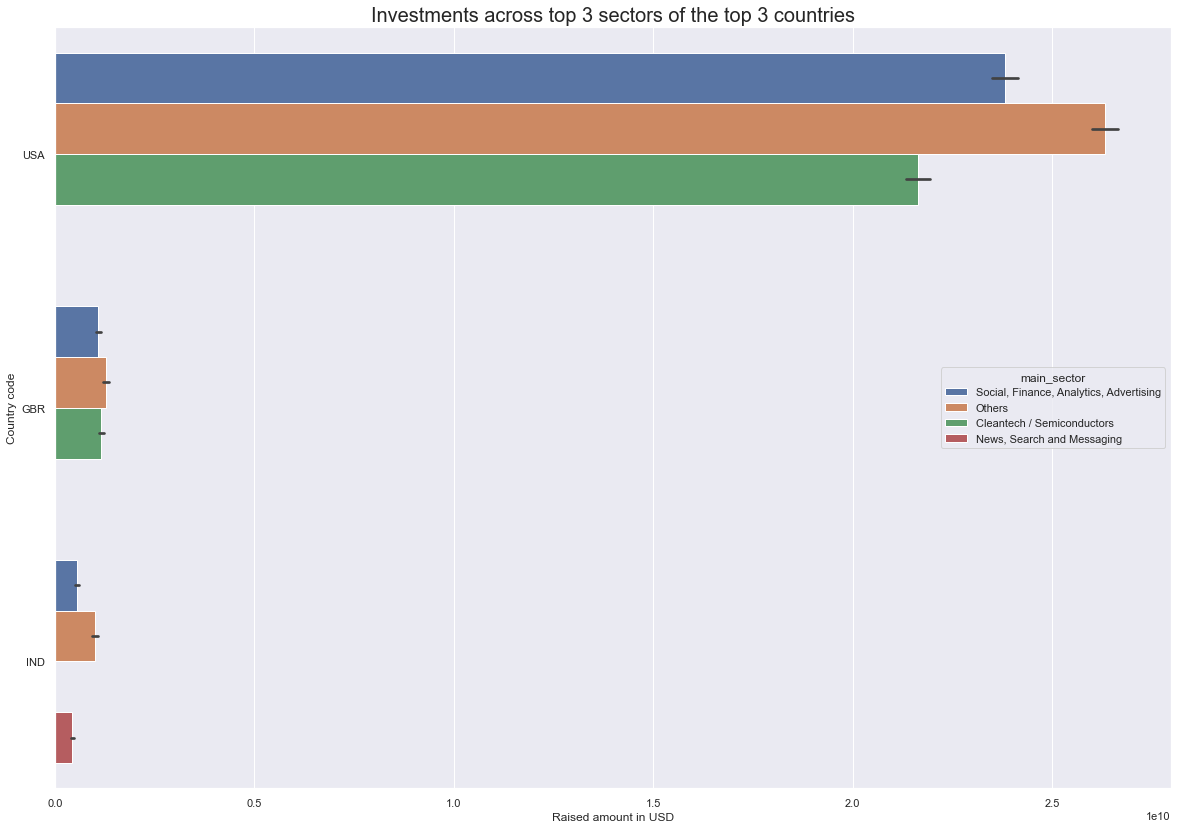

In [46]:
# Limiting our data to the relevant sectors for each country
D1_subset = D1[D1['main_sector'].isin(D1_topSectors[0:3].tolist())]
D2_subset = D2[D2['main_sector'].isin(D2_topSectors[0:3].tolist())]
D3_subset = D3[D3['main_sector'].isin(D3_topSectors[0:3].tolist())]
dataframes = [D1_subset, D2_subset, D3_subset]
result = pd.concat(dataframes)
plt.figure(figsize=(20, 14))
myFigure = sns.barplot(y = 'country_code', x = 'raised_amount_usd', hue = "main_sector", data=result, estimator=np.sum)
myFigure.set(xlabel='Raised amount in USD', ylabel='Country code')
myFigure.set_title('Investments across top 3 sectors of the top 3 countries',fontsize =20)
plt.show()